Dataset source : https://www.kaggle.com/itsmesunil/bank-loan-modelling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.tree import DecisionTreeClassifier

In [2]:
BankLoan_df = pd.read_csv (r'D:\Durham_AI - Downloads\AI Algorithms\BankLoan.csv')
display(BankLoan_df)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
type(BankLoan_df)

pandas.core.frame.DataFrame

In [4]:
#dropping ID column since we cannot do anything with it
Loan_df=BankLoan_df.drop(columns="ID")
Loan_df.shape

(5000, 13)

In [5]:
Loan_df=Loan_df.drop(columns="ZIP Code")
Loan_df.shape

(5000, 12)

In [6]:
Loan_df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
Loan_df.drop_duplicates()
Loan_df.shape

(5000, 12)

In [8]:
print(Loan_df.isnull().sum())

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


Since this dataset does not contain any duplicates, missing values. I would be going forward with EDA process.

## Exploratory Data Analysis

In [9]:
Loan_report = sv.analyze(Loan_df)

:FEATURES DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [10]:
Loan_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


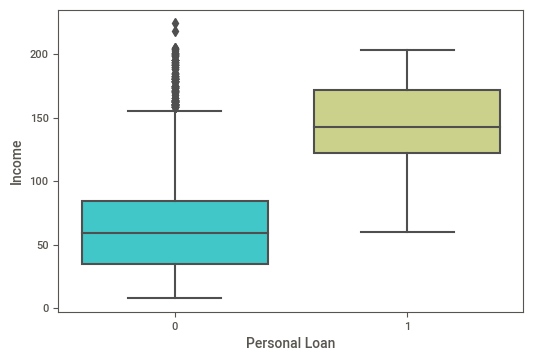

In [11]:
sns.boxplot(x="Personal Loan", y="Income", data=Loan_df,palette='rainbow')

There is a huge difference in median income of people who are likely to take a loan and those that are not.

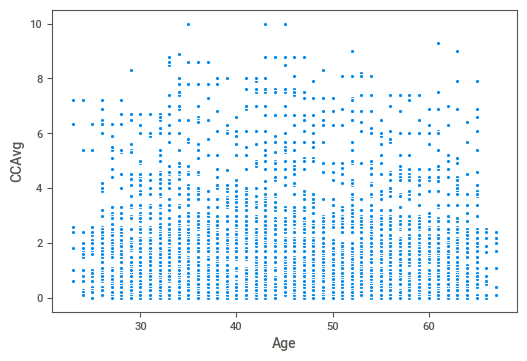

In [12]:
sns.scatterplot(data=Loan_df, x="Age", y="CCAvg")

The credit card average seems to be higher between the ages between 40-50 comapred to rest of the ages. 

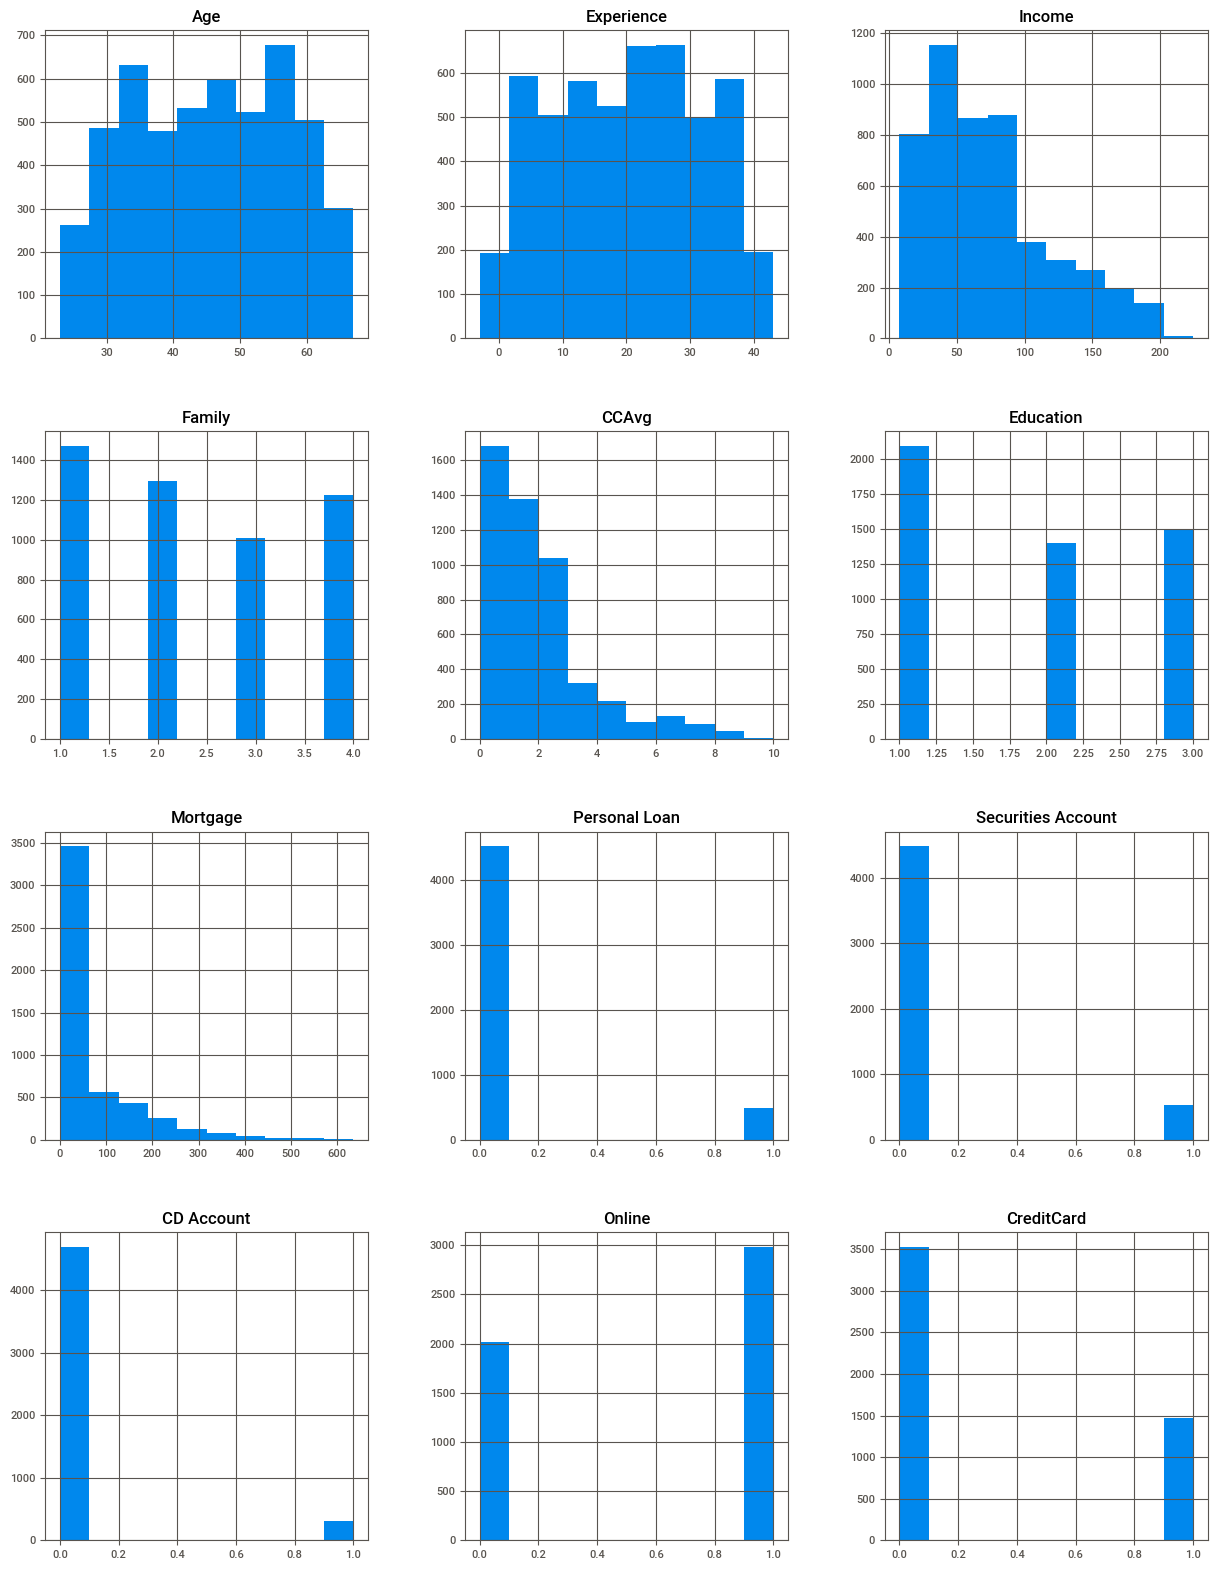

In [13]:
Loan_df.hist(figsize=(15,20))
plt.show()

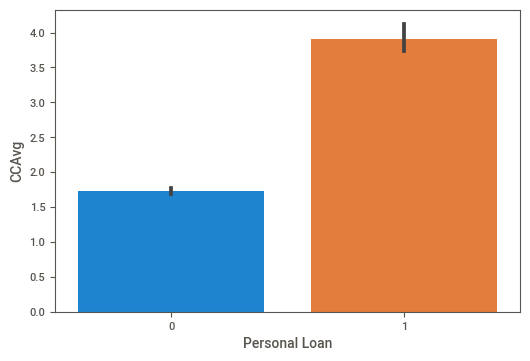

In [14]:
sns.barplot(x='Personal Loan',y='CCAvg',data=Loan_df)

DEPLOYMENT#1 [start]-----

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#split x and y datasets
X = Loan_df.drop('Personal Loan',axis=1)
y = Loan_df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [17]:
display(X_train)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2654,60,36,49,4,2.2,1,204,1,0,1,0
2468,49,23,133,1,7.3,1,0,0,0,1,1
290,51,25,80,1,4.9,1,0,0,0,0,0
1463,35,10,94,1,0.0,1,174,0,0,1,0
4508,27,2,85,1,1.9,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4171,58,31,49,4,2.5,2,0,0,0,1,0
599,28,4,103,2,2.5,1,0,0,0,1,1
1361,50,26,38,4,0.9,2,0,0,0,1,0
1547,47,21,52,1,1.2,2,194,0,0,0,0


In [18]:
X_train.shape

(3500, 11)

In [19]:
X_test.shape

(1500, 11)

In [20]:
tree1 = DecisionTreeClassifier()
tree1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
tree1.score(X_train, y_train)

1.0

In [22]:
tree1.score(X_test, y_test)

0.9786666666666667

In [23]:
probability_pred_tree1 = int(tree1.predict([[45,20,130,2,1.5,2,0,1,1,1,1]]))
if probability_pred_tree1 == 1:
    print("Most likely to purchase loan")
else:
    print('Not likely to purchase loan')

Most likely to purchase loan




Deployment#1 Ended



Deployment#2: Start    

In [24]:
tree2 = DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 2,min_samples_split = 5,
                              min_samples_leaf = 2, max_features = 2 )
tree2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [25]:
tree2.score(X_train, y_train)

0.9045714285714286

In [26]:
tree2.score(X_test, y_test)

0.9026666666666666

In [27]:
probability_pred_tree2 = int(tree1.predict([[45,20,130,2,1.5,2,0,1,1,1,1]]))
if probability_pred_tree2 == 1:
    print("Most likely to purchase loan")
else:
    print('Not likely to purchase loan')

Most likely to purchase loan


Deployment 3 starts

In [28]:
tree3 = DecisionTreeClassifier(max_depth=3)
tree3.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
tree3.score(X_train, y_train)

0.9854285714285714

In [30]:
tree3.score(X_test, y_test)

0.9793333333333333

In [31]:
probability_pred_tree3 = int(tree1.predict([[45,20,130,2,1.5,2,0,1,1,1,1]]))
if probability_pred_tree3 == 1:
    print("Most likely to purchase loan")
else:
    print('Not likely to purchase loan')

Most likely to purchase loan


Deployment 3 ends-----

Splitting 30% test data into 15% validation set and 15% test dataset

In [32]:
(X_train, X_vt, y_train, y_vt) = train_test_split(X, y, test_size=0.3, random_state=0) #70% training
(X_validation, X_test, y_validation, y_test) = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0) #15% validation # 15% test

In [33]:
X_train.shape

(3500, 11)

In [34]:
X_validation.shape

(750, 11)

In [35]:
X_test.shape

(750, 11)

In [36]:
dtree = DecisionTreeClassifier()

In [37]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
dtree.score(X_train, y_train)

1.0

In [39]:
dtree.score(X_validation, y_validation)

0.9826666666666667

In [40]:
dtree.score(X_test, y_test)

0.976

In [41]:
probability_pred_dtree = int(tree1.predict([[45,20,130,2,1.5,2,0,1,1,1,1]]))
if probability_pred_dtree == 1:
    print("Most likely to purchase loan")
else:
    print('Not likely to purchase loan')

Most likely to purchase loan


Deployment 2 on validation, test and train data

In [42]:
dtree2 = DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 2,  min_samples_split = 5,
                              min_samples_leaf = 2, max_features = 2)
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [43]:
dtree2.score(X_train, y_train)

0.8994285714285715

In [44]:
dtree2.score(X_validation, y_validation)

0.9173333333333333

In [45]:
dtree2.score(X_test, y_test)

0.912

In [46]:
probability_pred_dtree2 = int(tree1.predict([[45,20,130,2,1.5,2,0,1,1,1,1]]))
if probability_pred_dtree2 == 1:
    print("Most likely to purchase loan")
else:
    print('Not likely to purchase loan')

Most likely to purchase loan


I have built around 5 decision tree models to check which model is suitable for the existing problem statement.
Out of which 3 trees are with Train and test datasete and the rest 2 are with train, validation and test datasets.


CONCLUSION: Tree2 is the best model because it is not overfitting which has 91% of accuracy and depth of 2.
    